Highly multiplexed immunofluorescence imaging of human tissues and tumors using t-CyCIF and conventional optical microscopes

ShortName: lin2018highly

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://lincs.hms.harvard.edu/lin-elife-2018/

In [3]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

In [4]:
path = '/home/yzy/projects/SODB/SODB_code/SODB/revision/Raw2Anndata/SpatialProteomics/t-CyCIF/data'


# run all

/tmp/ipykernel_1062678/2700766426.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


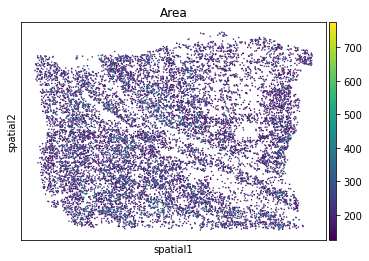

In [5]:
for file in os.listdir(path):
    if 'csv' not in file:
        continue
    sample_name = file.split('.')[0]
    raw_pd = pd.read_csv(f'{path}/{file}')

    var_list = []
    obs_list = []
    obs_keyword_list = ['Area','Circ','X','Y','frame','COL','ROW','Xt','Yt']
    for var in raw_pd.columns:
        if 'Hoechst' in var:
            obs_list.append(var)
        elif var in obs_keyword_list:
            obs_list.append(var)
        else:
            var_list.append(var)


    X = np.array(raw_pd.loc[:,var_list].values).astype('float')
    adata = ad.AnnData(X)
    adata.var_names = var_list
    for obs in obs_list:
        adata.obs[obs] = raw_pd[[obs]].values

    adata.obsm['spatial'] = np.vstack([adata.obs['Xt'],adata.obs['Yt']]).transpose()
    adata.write_h5ad(f'Figure9_RCC_{sample_name}.h5ad')
    sc.pl.embedding(adata,basis='spatial',color='Area')